[Reference](https://medium.com/@evertongomede/clustering-text-in-natural-language-processing-unveiling-patterns-and-insights-8c3cd137b135)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


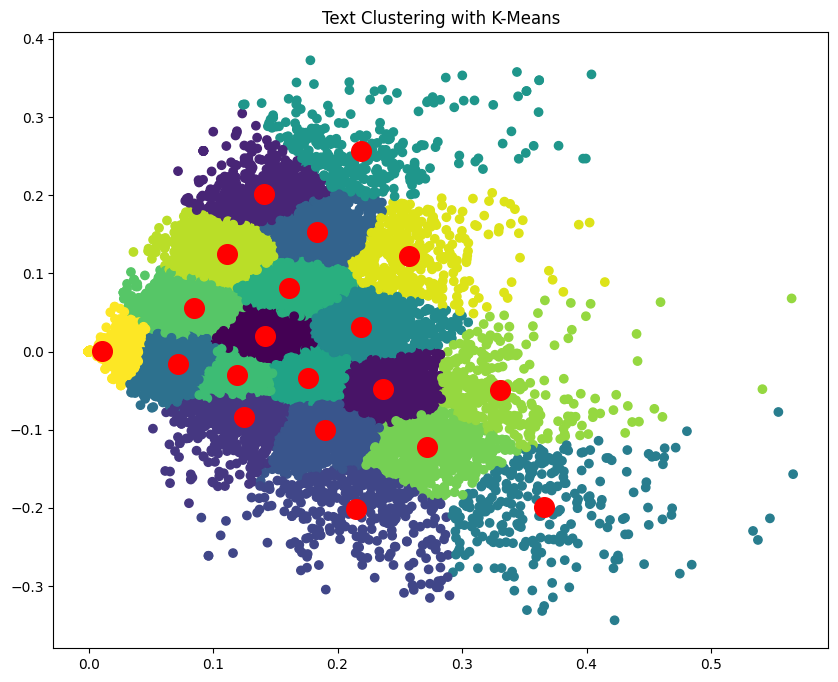

In [1]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

# Load the 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.5, max_features=1000, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(newsgroups.data)

# Reduce dimensionality using LSA (Latent Semantic Analysis)
lsa = TruncatedSVD(n_components=2)
lsa_matrix = lsa.fit_transform(tfidf_matrix)

# Perform K-Means clustering
k = 20  # Number of clusters (based on the 20 Newsgroups categories)
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(lsa_matrix)

# Visualize the clusters
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

plt.figure(figsize=(10, 8))
plt.scatter(lsa_matrix[:, 0], lsa_matrix[:, 1], c=labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1,], s=200, c='red')
plt.title("Text Clustering with K-Means")
plt.show()